In [134]:
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
df = pd.read_csv('data/WhatsgoodlyData-6.csv')
df

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,What social platform has influenced your onlin...,Mobile,Global results,Facebook,548,0.205
1,What social platform has influenced your onlin...,Mobile,Global results,Instagram,916,0.342
2,What social platform has influenced your onlin...,Mobile,Global results,Snapchat,86,0.032
3,What social platform has influenced your onlin...,Mobile,Global results,Twitter,179,0.067
4,What social platform has influenced your onlin...,Mobile,Global results,None,947,0.354
...,...,...,...,...,...,...
1445,What social platform has influenced your onlin...,Custom,Sexual orientation? Straight,Facebook,215,0.180
1446,What social platform has influenced your onlin...,Custom,Sexual orientation? Straight,Instagram,354,0.297
1447,What social platform has influenced your onlin...,Custom,Sexual orientation? Straight,Snapchat,44,0.037
1448,What social platform has influenced your onlin...,Custom,Sexual orientation? Straight,Twitter,88,0.074


In [136]:
df.isnull().sum()

Question               0
Segment Type           0
Segment Description    0
Answer                 0
Count                  0
Percentage             0
dtype: int64

In [137]:
df['Question'].unique()

array(['What social platform has influenced your online shopping most?'],
      dtype=object)

In [138]:
df['Segment Type'].unique()

array(['Mobile', 'Web', 'Gender', 'University', 'Custom'], dtype=object)

In [139]:
df['Answer'].unique()

array(['Facebook', 'Instagram', 'Snapchat', 'Twitter', 'None'],
      dtype=object)

In [140]:
import pickle
l = df['Segment Description'].unique().tolist()
with open("file.txt", "w") as f:
    for s in l:
        f.write(str(s) +"\n")

In [141]:
df['Count'].unique()

array([548, 916,  86, 179, 947,   0,   2, 222, 535,  29,  57, 271, 326,
       380,  56, 122, 678,   1,  21,   5,  18,   4,   3,  10,  15,  11,
        13,   6,  14,   8,  17,   9,  12,  25,  30,  27,  47,  16,  35,
        44,  38,  32,  23,   7,  64,  75,  95,  26,  34,  24,  84,  19,
        54,  96, 120, 174,  52, 283,  40,  76,  61, 105,  20, 168,  37,
        22,  70,  83, 130,  71, 149,  42, 178,  41, 111, 144,  45, 110,
       117, 250,  69, 304,  87, 159,  50, 181, 197, 285, 291,  39,  58,
        51, 172, 231, 292,  68, 150,  65,  53, 124, 128, 245, 325, 504,
        99, 552, 148, 258,  60, 279, 362, 579, 108, 596, 104, 232,  97,
       107,  28,  48,  62, 113,  78,  79,  33,  49,  59,  46,  36, 167,
       321, 443, 198, 299,  80, 180,  72,  43,  74, 186, 284, 241, 264,
       347, 502, 571,  98, 164, 270, 313, 546,  93, 467, 267, 368, 356,
       157, 156, 145, 205, 322,  31,  55,  66,  81,  90, 320, 499, 574,
        92, 123, 112, 160, 183, 147, 239, 274,  88, 143, 781, 15

In [142]:
df_mobile = df.loc[df['Segment Type'] == 'Mobile']
df_web = df.loc[df['Segment Type'] == 'Web']
df_gender = df.loc[df['Segment Type'] == 'Gender']
df_university = df.loc[df['Segment Type'] == 'University']
df_custom = df.loc[df['Segment Type'] == 'Custom']

In [143]:
df_facebook = df.loc[df['Answer'] == 'Facebook']
df_instagram = df.loc[df['Answer'] == 'Instagram']
df_snapchat = df.loc[df['Answer'] == 'Snapchat']
df_twitter = df.loc[df['Answer'] == 'Twitter']
df_none = df.loc[df['Answer'] == 'None']

In [144]:
df_twitter.loc[df['Segment Description'] == 'Global results']

,Question,Segment Type,Segment Description,Answer,Count,Percentage
3,What social platform has influenced your onlin...,Mobile,Global results,Twitter,179,0.067


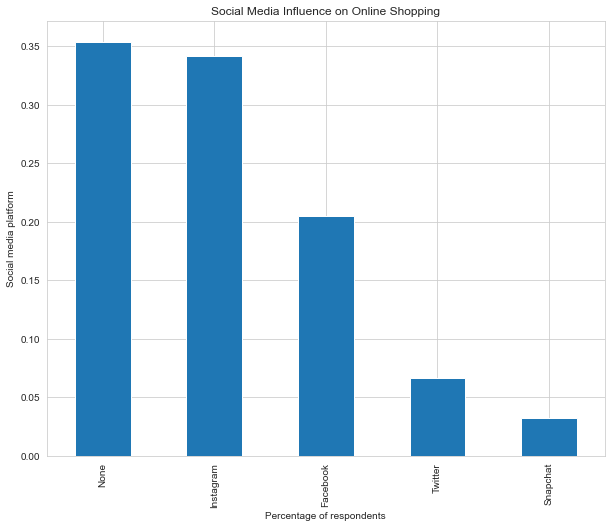

In [145]:
# Filter the dataset to include only the "Global results" segment description
global_results = df[df['Segment Description'] == 'Global results']

# Set the social media platform as the index and extract the percentage values
platform_percents = global_results.set_index('Answer')['Percentage']

# Sort the values in descending order
platform_percents = platform_percents.sort_values(ascending=False)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,8))
platform_percents.plot(kind='bar', ax=ax)

# Add chart labels and title
ax.set_xlabel('Percentage of respondents')
ax.set_ylabel('Social media platform')
ax.set_title('Social Media Influence on Online Shopping')
plt.show()

In [194]:
df = pd.read_csv('data/WhatsgoodlyData-6.csv')

# Filter the dataset to include only the required segment description and extract the percentage values
global_results = df[df['Segment Description'] == 'Global results'].set_index('Answer')['Percentage'].rename('Global')

female_voters = df[df['Segment Description'] == 'Female voters'].set_index('Answer')['Percentage'].rename('Female')
male_voters = df[df['Segment Description'] == 'Male voters'].set_index('Answer')['Percentage'].rename('Male')

college_students = df[df['Segment Description'] == "I'm in? College"].set_index('Answer')['Percentage'].rename('College students')

high_school_students = df[df['Segment Description'] == "I'm in? High School"].set_index('Answer')['Percentage'].rename('High School students')

post_grad_students = df[df['Segment Description'] == "I'm in? Post-grad"].set_index('Answer')['Percentage'].rename('Post-graduate students')

# Concatenate all the columns extracted earlier and store into a single dataframe
final_result = pd.concat([global_results, female_voters, male_voters, college_students, high_school_students, post_grad_students], axis=1)

final_result.to_csv("final-results.csv")

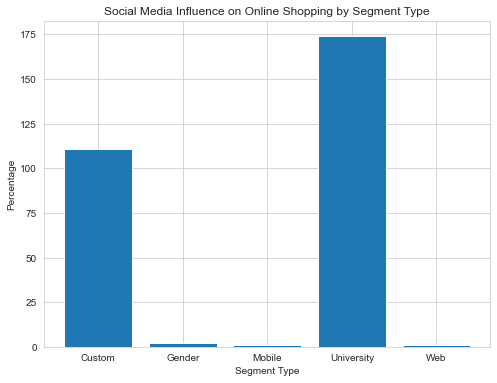

In [148]:
# Filter the data to include only the "Global results" segment description
global_results = df[df['Segment Description'] == 'Global results']

# Group the data by 'Segment Type' and calculate the sum of 'Count' and 'Percentage'
segment_counts = df.groupby('Segment Type').sum()['Count']
segment_percentages = df.groupby('Segment Type').sum()['Percentage']

# # Create a bar chart of the segment counts
# plt.figure(figsize=(8, 6))
# plt.bar(segment_counts.index, segment_counts.values)
# plt.xlabel('Segment Type')
# plt.ylabel('Count')
# plt.title('Social Media Influence on Online Shopping by Segment Type')
# plt.show()

# Create a bar chart of the segment percentages
plt.figure(figsize=(8, 6))
plt.bar(segment_percentages.index, segment_percentages.values)
plt.xlabel('Segment Type')
plt.ylabel('Percentage')
plt.title('Social Media Influence on Online Shopping by Segment Type')
plt.show()


In [149]:
# Filter the dataset to include only the "Global results" segment description
global_results = df[df['Segment Description'] == 'Global results']

# Set the social media platform as the index and extract the percentage values
segment_type_percents = global_results.set_index('Segment Type')['Percentage']
segment_type_percents

Segment Type
Mobile    0.205
Mobile    0.342
Mobile    0.032
Mobile    0.067
Mobile    0.354
Name: Percentage, dtype: float64

In [150]:
platform_percents

Answer
None                                                     0.354
Instagram                                                0.342
Facebook                                                 0.205
Twitter                                                  0.067
Snapchat                                                 0.032
Female       Answer
Facebook     0.199
Instagram    0.480
S...
Name: Percentage, dtype: object

Question               0
Segment Type           0
Segment Description    0
Answer                 0
Count                  0
Percentage             0
dtype: int64
Question                object
Segment Type            object
Segment Description     object
Answer                  object
Count                    int64
Percentage             float64
dtype: object


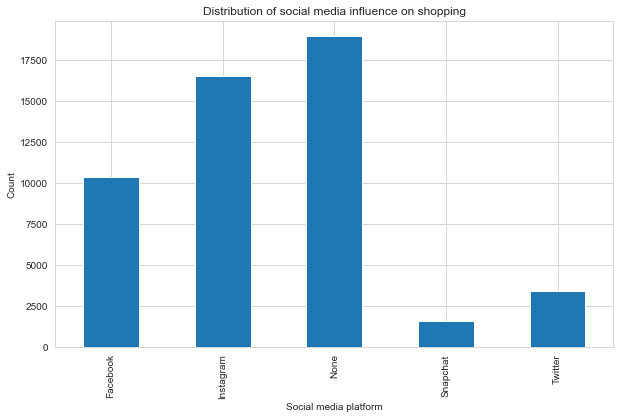

<Figure size 720x432 with 0 Axes>

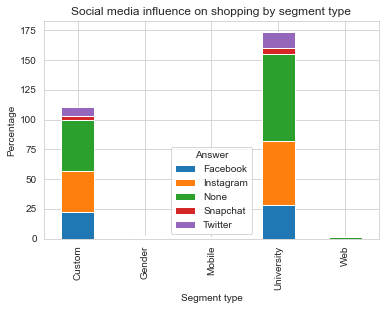

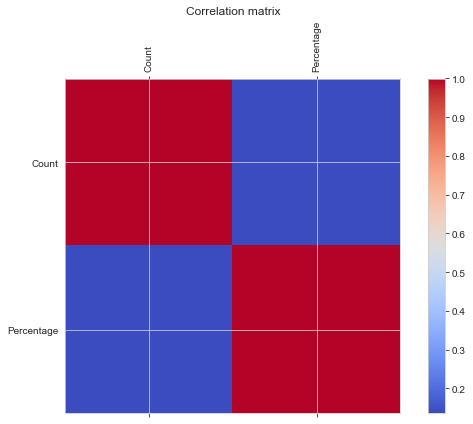

In [151]:
# Check for missing values and data types
print(df.isnull().sum())
print(df.dtypes)

# Identify the distribution of the target variable
plt.figure(figsize=(10, 6))
df.groupby('Answer')['Count'].sum().plot(kind='bar')
plt.title('Distribution of social media influence on shopping')
plt.xlabel('Social media platform')
plt.ylabel('Count')
plt.show()

# Analyze the relationship between the target variable and other features
plt.figure(figsize=(10, 6))
df.pivot_table(index='Segment Type', columns='Answer', values='Percentage', aggfunc='sum').plot(kind='bar', stacked=True)
plt.title('Social media influence on shopping by segment type')
plt.xlabel('Segment type')
plt.ylabel('Percentage')
plt.show()

# Look for correlations between different features
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
plt.matshow(corr_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title('Correlation matrix')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

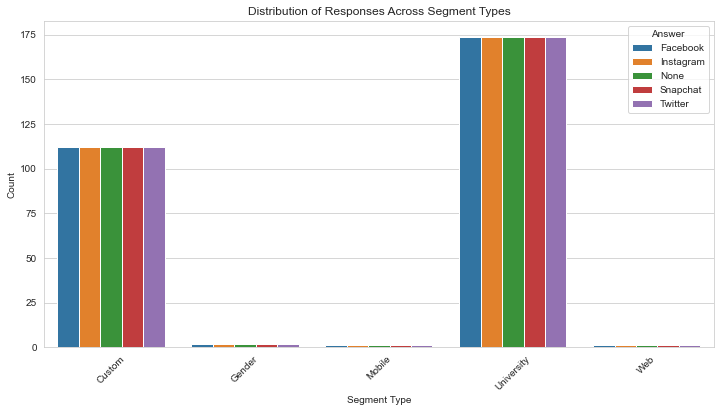

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('data/WhatsgoodlyData-6.csv')

# Group by segment type and answer, then count the number of occurrences
segment_counts = data.groupby(['Segment Type', 'Answer']).size().reset_index(name='Count')

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Segment Type', y='Count', hue='Answer', data=segment_counts)
plt.title('Distribution of Responses Across Segment Types')
plt.xlabel('Segment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [153]:
# Filter the data to only include university segments
university_data = data[data['Segment Type'] == 'University']

# Group by segment description and answer, then count the number of occurrences
university_counts = university_data.groupby(['Segment Description', 'Answer']).size().reset_index(name='Count')

# Find the total number of responses per university
total_responses_per_university = university_counts.groupby('Segment Description')['Count'].sum().reset_index(name='Total Responses')

# Calculate the percentage of each answer per university
university_counts_with_perc = university_counts.merge(total_responses_per_university, on='Segment Description')
university_counts_with_perc['Percentage'] = (university_counts_with_perc['Count'] / university_counts_with_perc['Total Responses']) * 100

# Find the university with the highest and lowest percentage of a specific social media platform influence, e.g., Instagram
social_platform = 'Instagram'
instagram_influence = university_counts_with_perc[university_counts_with_perc['Answer'] == social_platform]

highest_influence = instagram_influence.loc[instagram_influence['Percentage'].idxmax()]
lowest_influence = instagram_influence.loc[instagram_influence['Percentage'].idxmin()]

print(f"University with the highest {social_platform} influence: {highest_influence['Segment Description']} ({highest_influence['Percentage']}%)")
print(f"University with the lowest {social_platform} influence: {lowest_influence['Segment Description']} ({lowest_influence['Percentage']}%)")


University with the highest Instagram influence: Appalachian State University (20.0%)
University with the lowest Instagram influence: Appalachian State University (20.0%)


/var/folders/yl/pr52dtxn48s9tqvcb70mkk340000gn/T/ipykernel_47388/1309691771.py:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  index = pd.np.arange(len(platforms))


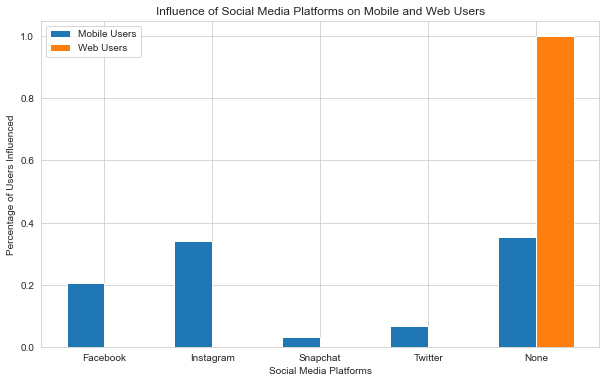

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'data.csv' with the name of your CSV file
data = pd.read_csv('data/WhatsgoodlyData-6.csv')

# Filter the dataset to keep only mobile and web user data
mobile_data = data[data['Segment Type'] == 'Mobile']
web_data = data[data['Segment Type'] == 'Web']

# Calculate the percentage of users influenced by each social media platform for mobile and web users
mobile_perc = mobile_data['Percentage']
web_perc = web_data['Percentage']
platforms = mobile_data['Answer']

# Set up the grouped bar chart
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
bar_width = 0.35
index = pd.np.arange(len(platforms))

rects1 = ax.bar(index, mobile_perc, bar_width, label='Mobile Users')
rects2 = ax.bar(index + bar_width, web_perc, bar_width, label='Web Users')

# Customize the chart
ax.set_xlabel('Social Media Platforms')
ax.set_ylabel('Percentage of Users Influenced')
ax.set_title('Influence of Social Media Platforms on Mobile and Web Users')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(platforms)
ax.legend()

# Show the chart
plt.show()
